# The Sparks Foundation 

# Data Science and Business Analytics Internship 

# Task 3 - Exploratory Data Analysis - Retail 
### {For this task we will be performing explorary data anlysis on the supersamplestore dataset} 

### Data Source -   https://bit.ly/3i4rbWl
### Problem statement - As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the  data?

In [1]:
#Importing essential libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#Reading the csv file
ssd = pd.read_csv('SampleSuperstore.csv')
ssd.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Info about the dataset
ssd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
#Checking for null values
ssd.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
#Basic description of dataset
ssd.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Checking for duplicate entries in datset
ssd.duplicated().sum()

17

In [7]:
#Dropping the duplicates 
ssd.drop_duplicates(inplace=True)

In [8]:
#New sahpe of dataframe
ssd.shape

(9977, 13)

In [9]:
#Number of unique entries in the dataset
for col in ssd.columns:
    if ssd[col].dtype=='object':
        print("Number of unique entries in",col + " are",ssd[col].nunique())
        print("=================================================")

Number of unique entries in Ship Mode are 4
Number of unique entries in Segment are 3
Number of unique entries in Country are 1
Number of unique entries in City are 531
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17


In [10]:
#Dropping the Country and Postal code as all the entries are of same country and postal code is of no use
ssd=ssd.drop(['Country', 'Postal Code'], axis=1)

In [11]:
#Final dataframe
ssd

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


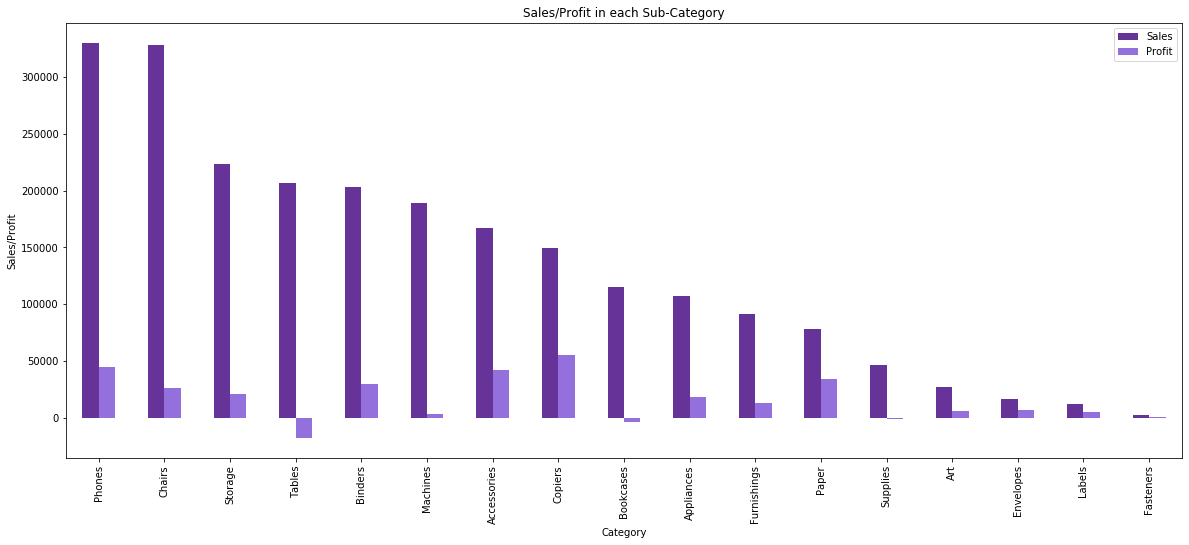

In [12]:
#Sales/Profit in each sub category
subcategory_sale_profit = ssd.groupby('Sub-Category')[['Sales', 'Profit']].sum()
subcategory_sale_profit.sort_values('Sales', ascending = False, inplace=True)
subcategory_sale_profit.plot(kind = "bar",color = ["rebeccapurple","mediumpurple"], figsize = (20,8))

plt.title('Sales/Profit in each Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales/Profit')
plt.show()

###### Phones and chairs have highest sales whereas labels and fasteners have least sales in sub-category.  Tables sub category has encountered a loss compared to other sub-categories.

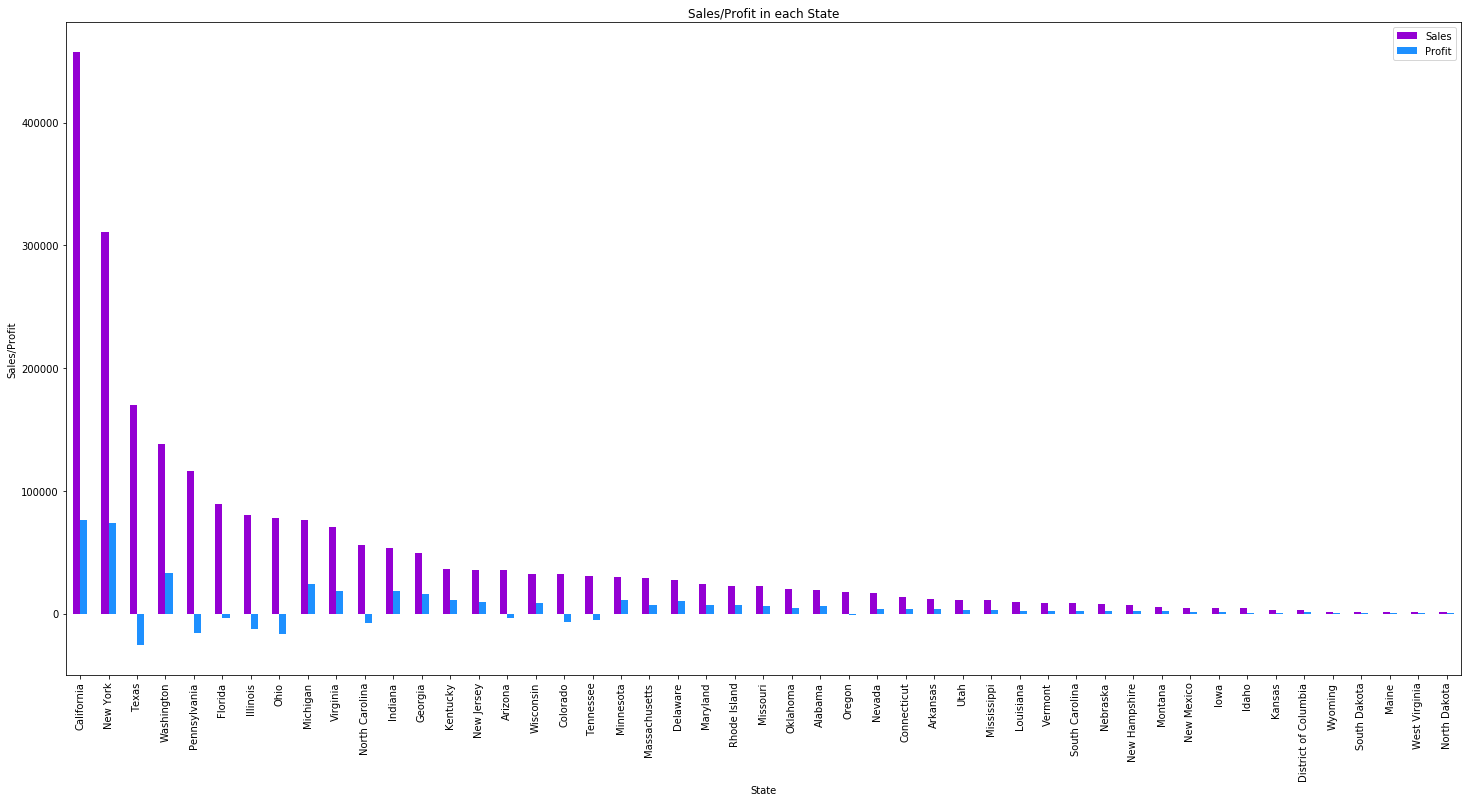

In [13]:
#Sales/Profit in each State
state_sale_profit = ssd.groupby('State')[['Sales','Profit']].sum()
state_sale_profit.sort_values('Sales', ascending = False, inplace=True)
state_sale_profit
state_sale_profit.plot(kind = "bar", figsize=(25,12), color = ['darkviolet','dodgerblue'])
plt.title('Sales/Profit in each State')
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('Sales/Profit')
plt.show()

###### California and New York state has more sales than others. Some states had loss such as Texas,Pennyslvania ,Florida,etc. 

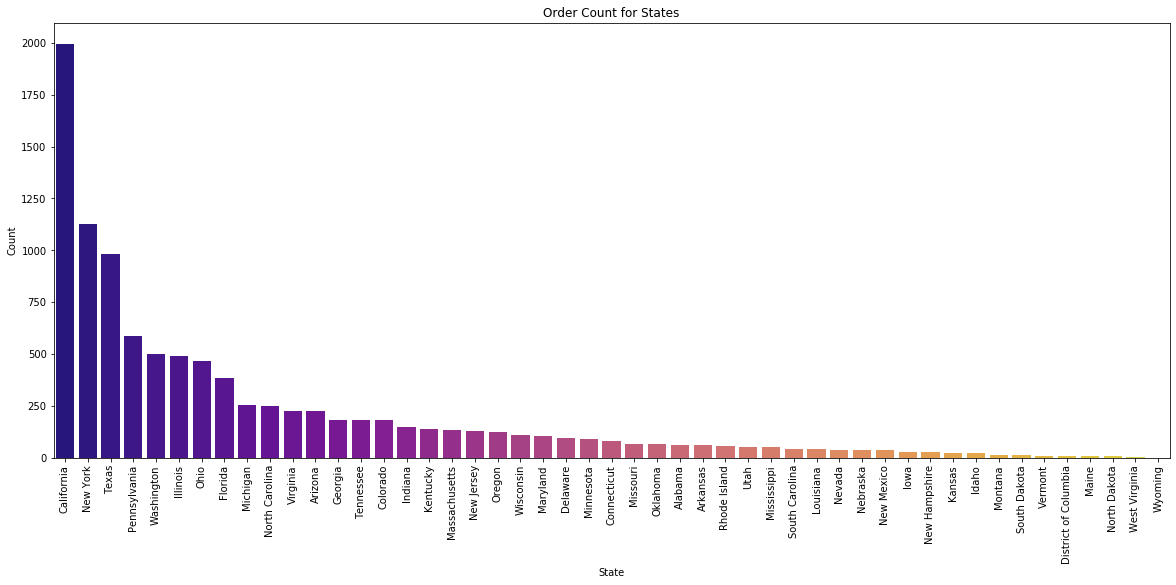

In [14]:
#Number of order in each state 
plt.figure(figsize=(20,8))
sns.countplot(ssd['State'], order = ssd['State'].value_counts().index, palette = 'plasma')
plt.title("Order Count for States")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

###### California and NY city has more orders . California has double the orders than of Texas. 

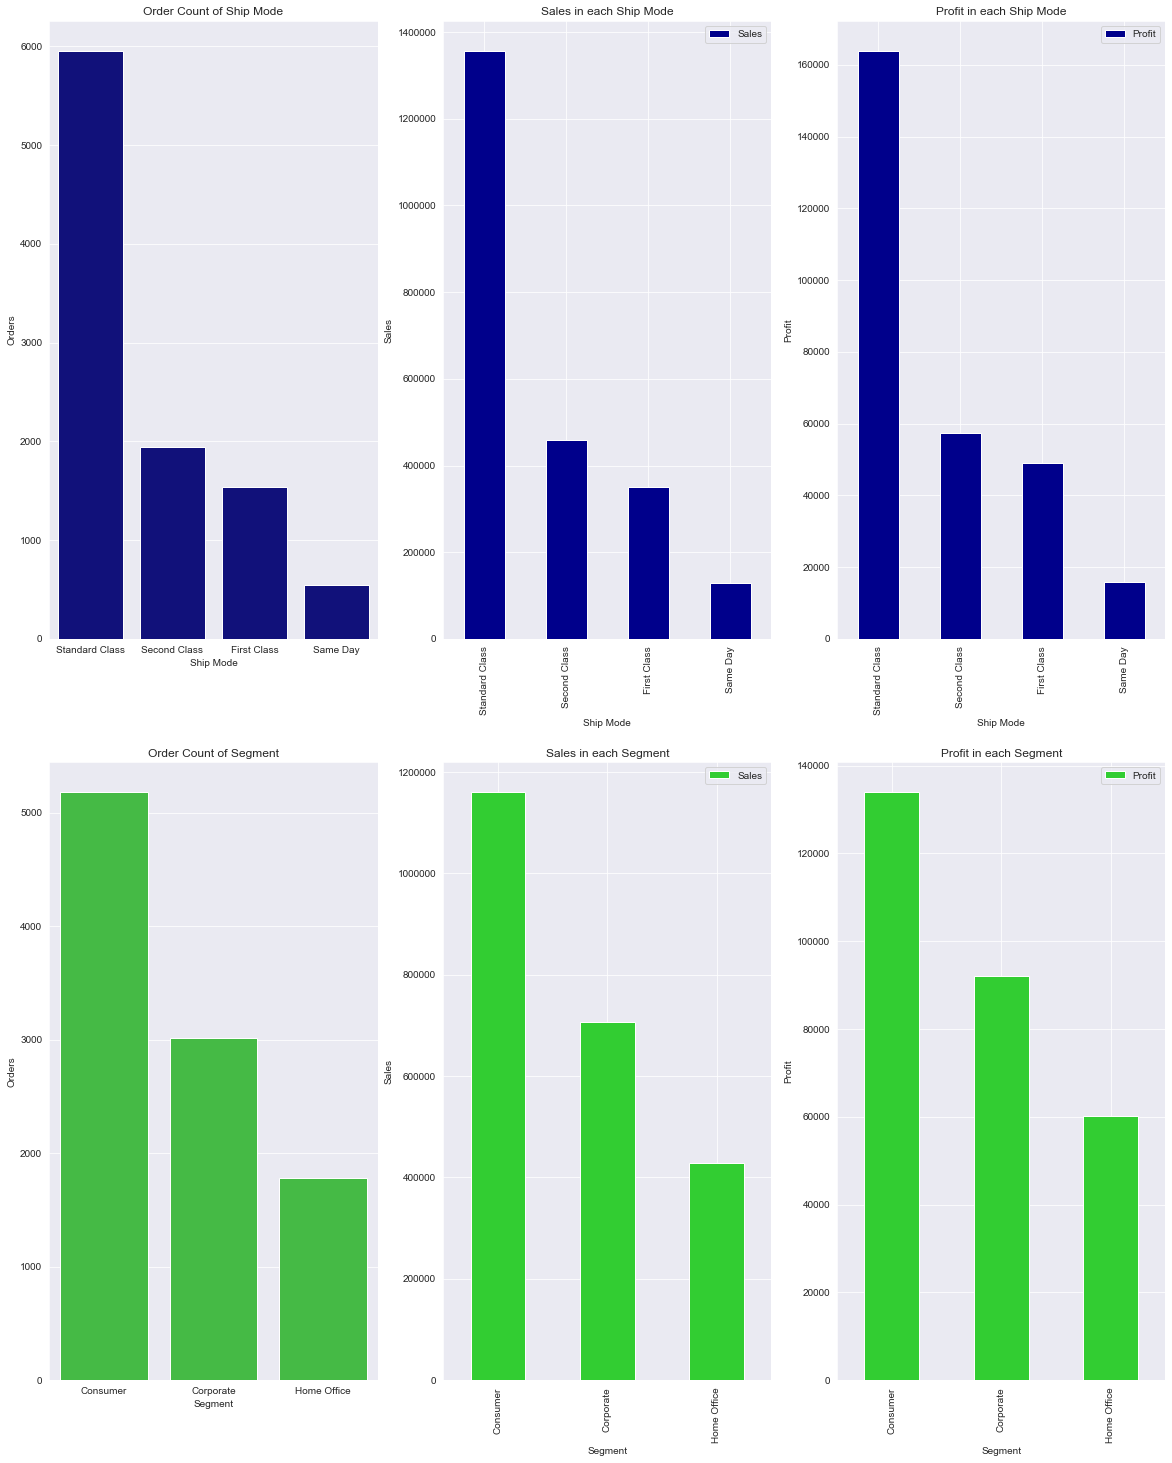

In [15]:
 sns.set_style('darkgrid')
f, ax = plt.subplots(2, 3, figsize=(20,25))
#Order count/Sales/Profit in each Ship Mode 
sns.countplot(ssd['Ship Mode'], color = 'darkblue', order = ssd['Ship Mode'].value_counts().index, ax=ax[0][0])
ax[0][0].title.set_text("Order Count of Ship Mode")
ax[0][0].set_xlabel("Ship Mode")
ax[0][0].set_ylabel("Orders")

ship_sale_profit = ssd.groupby('Ship Mode')[['Sales', 'Profit']].sum()
ship_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
ship_sale_profit.plot(y='Sales', kind = "bar", color = 'darkblue', ax=ax[0][1])
ax[0][1].title.set_text('Sales in each Ship Mode')
ax[0][1].set_xlabel('Ship Mode')
ax[0][1].set_ylabel('Sales')


ship_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True) 
ship_sale_profit.plot(y='Profit', kind = "bar", color = 'darkblue', ax=ax[0][2])
ax[0][2].title.set_text('Profit in each Ship Mode')
ax[0][2].set_xlabel('Ship Mode')
ax[0][2].set_ylabel('Profit')

#Order count/Sales/Profit in each Segment

sns.countplot(ssd['Segment'], color = 'limegreen', order = ssd['Segment'].value_counts().index, ax=ax[1][0])
ax[1][0].title.set_text("Order Count of Segment")
ax[1][0].set_xlabel("Segment")
ax[1][0].set_ylabel("Orders")

segment_sale_profit = ssd.groupby('Segment')[['Sales', 'Profit']].sum()
segment_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
segment_sale_profit.plot(y='Sales', kind = "bar", color = 'limegreen', ax=ax[1][1])
ax[1][1].title.set_text('Sales in each Segment')
ax[1][1].set_xlabel('Segment')
ax[1][1].set_ylabel('Sales')

segment_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True) 
segment_sale_profit.plot(y='Profit', kind = "bar", color = 'limegreen', ax=ax[1][2])
ax[1][2].title.set_text('Profit in each Segment')
ax[1][2].set_xlabel('Segment')
ax[1][2].set_ylabel('Profit')

plt.show()

###### Standard class has more orders,sales and profit than other ship modes. 
######  Consumer segment has more orders,salesand profit compare to others.

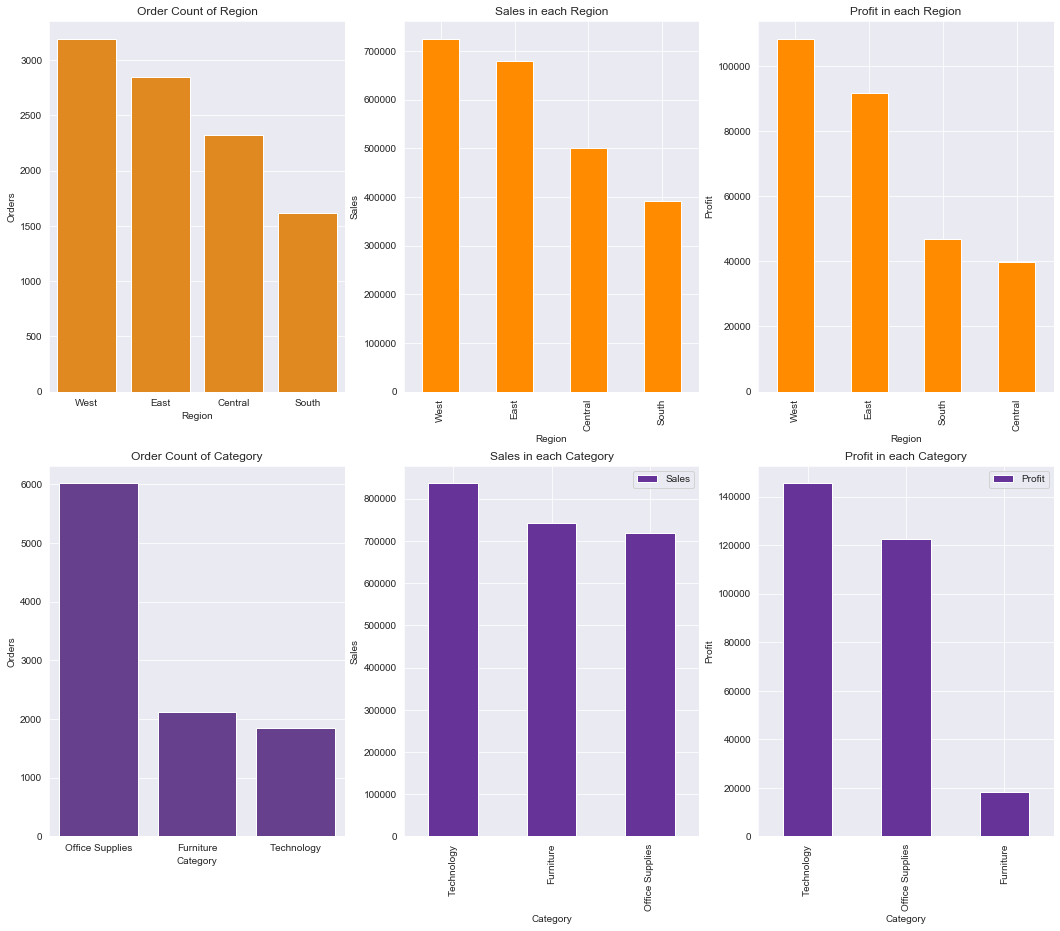

In [16]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 3, figsize=(18,15))
#Order count/Sales/Profit in each Region

sns.countplot(ssd['Region'], color = 'darkorange', order = ssd['Region'].value_counts().index, ax=ax[0][0])
ax[0][0].title.set_text("Order Count of Region")
ax[0][0].set_xlabel("Region")
ax[0][0].set_ylabel("Orders")

region_sale_profit = ssd.groupby('Region')[['Sales', 'Profit']].sum()
region_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
region_sale_profit.plot(y='Sales', kind = "bar", color = 'darkorange', ax=ax[0][1])
ax[0][1].title.set_text('Sales in each Region')
ax[0][1].set_xlabel('Region')
ax[0][1].set_ylabel('Sales')
ax[0][1].get_legend().remove()

region_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True) 
region_sale_profit.plot(y='Profit', kind = "bar", color = 'darkorange', ax=ax[0][2])
ax[0][2].title.set_text('Profit in each Region')
ax[0][2].set_xlabel('Region')
ax[0][2].set_ylabel('Profit')
ax[0][2].get_legend().remove()

#Order count/Sales/Profit in each Category

sns.countplot(ssd['Category'], color = 'rebeccapurple', order = ssd['Category'].value_counts().index, ax=ax[1][0])
ax[1][0].title.set_text("Order Count of Category")
ax[1][0].set_xlabel("Category")
ax[1][0].set_ylabel("Orders")

category_sale_profit = ssd.groupby('Category')[['Sales', 'Profit']].sum()
category_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
category_sale_profit.plot(y='Sales', kind = "bar", color = 'rebeccapurple', ax=ax[1][1])
ax[1][1].title.set_text('Sales in each Category')
ax[1][1].set_xlabel('Category')
ax[1][1].set_ylabel('Sales')

category_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True)
category_sale_profit.plot(y='Profit', kind = "bar", color = 'rebeccapurple', ax=ax[1][2])
ax[1][2].title.set_text('Profit in each Category')
ax[1][2].set_xlabel('Category')
ax[1][2].set_ylabel('Profit')

plt.show()

###### West and East region has almost similar ratio of orders,sales,profit than Central and South region.
###### Office supplies has most orders. All the categoies has same sales. Technology and Office Supplies has more profit than Furniture.

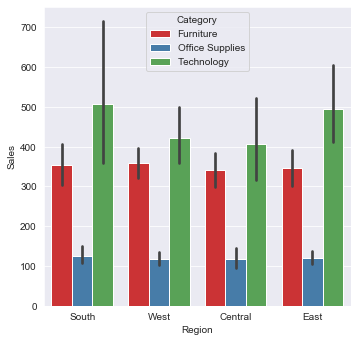

In [17]:
#Sales of Category in each region
plt.figure(figsize=[5.5,5.5])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ssd, palette="Set1")

###### In each region sales of Office supplies are very low.

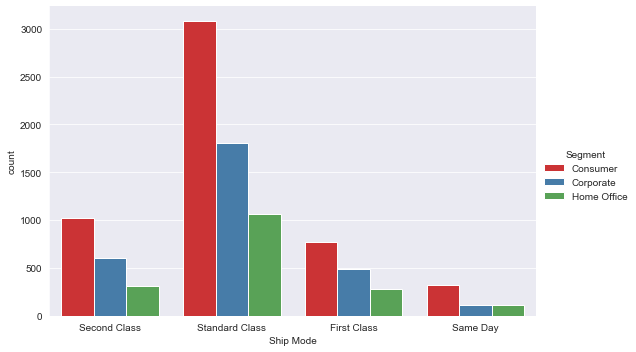

In [18]:
#Segment count in each Ship Mode 
sns.catplot("Ship Mode", hue="Segment", data=ssd, kind="count", aspect=1.5, palette="Set1")

###### Conusmer Segment is highest than other segments in each Ship mode 

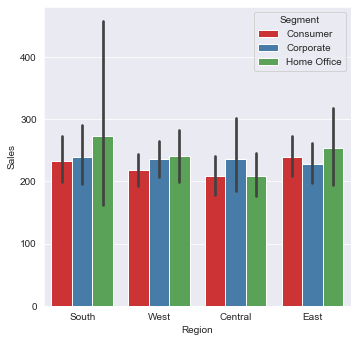

In [19]:
#Segment wise sales in Each region
plt.figure(figsize=[5.5,5.5])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ssd, palette="Set1")

###### There is not much difference in the regions but overall corporate is leading a bit.

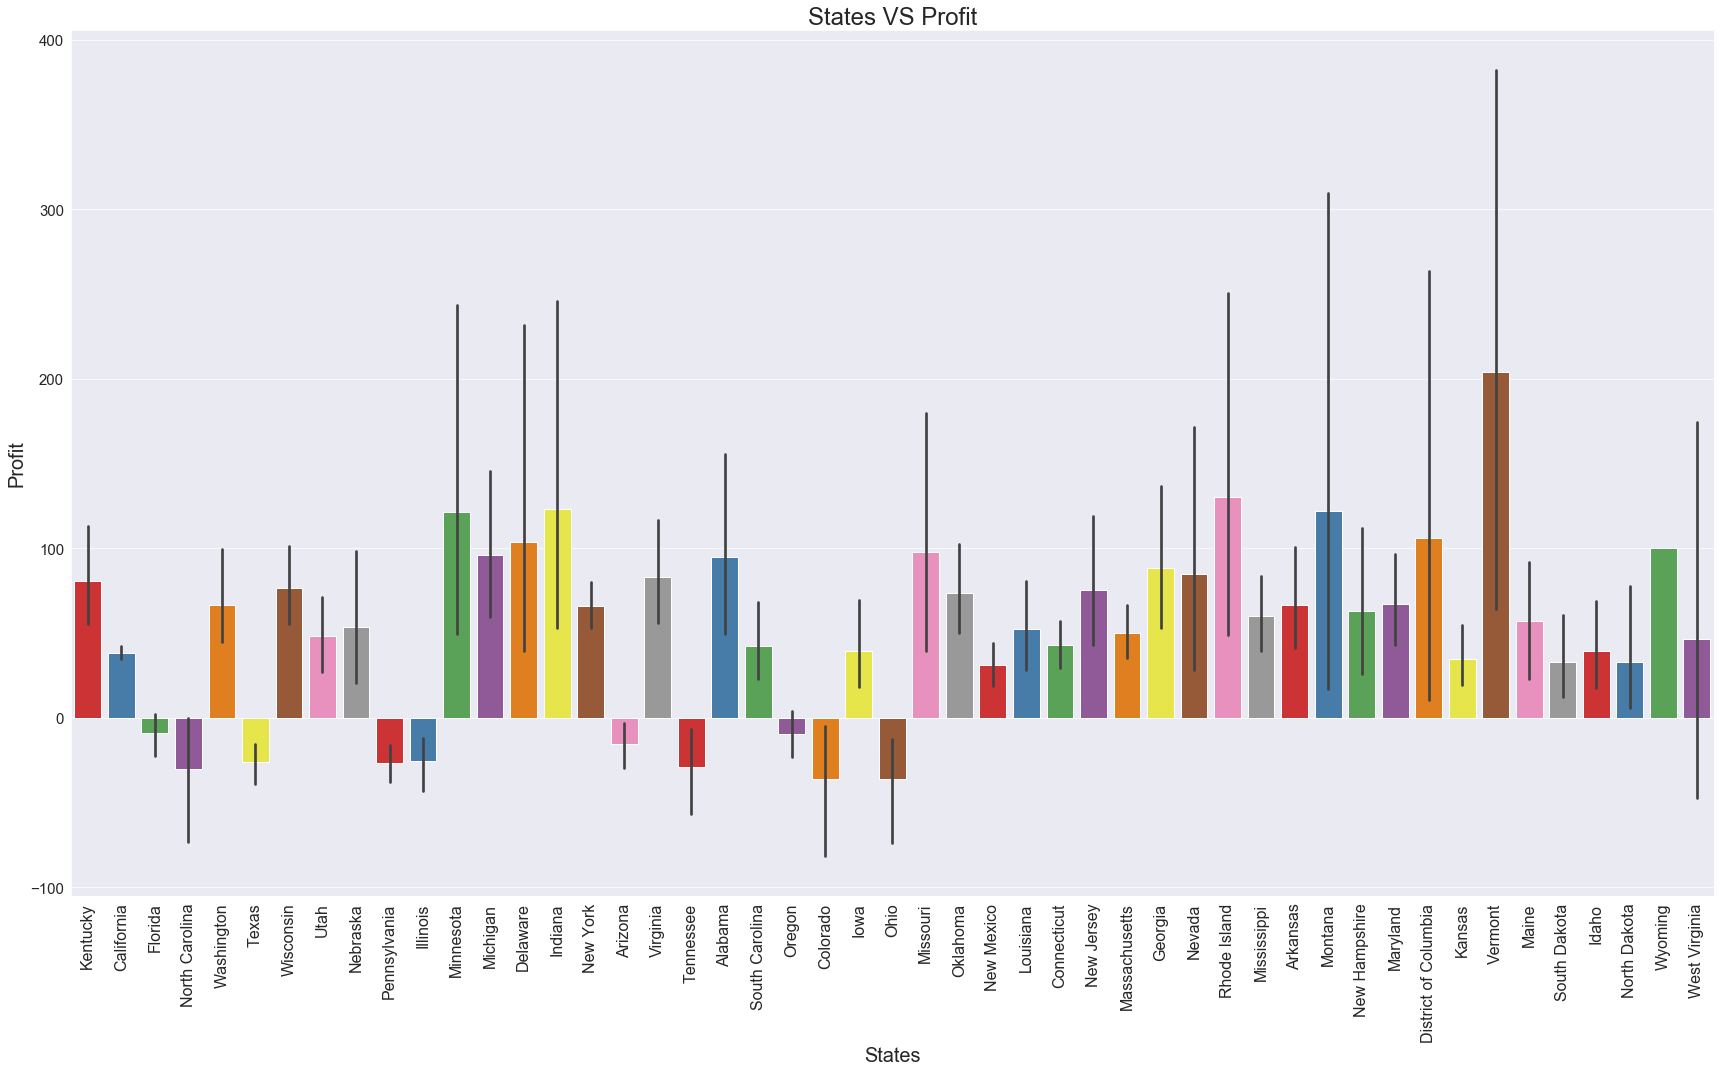

In [20]:
#State wise profit
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ssd, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

###### Some states are generating more profits whereas some have encountered a loss. 

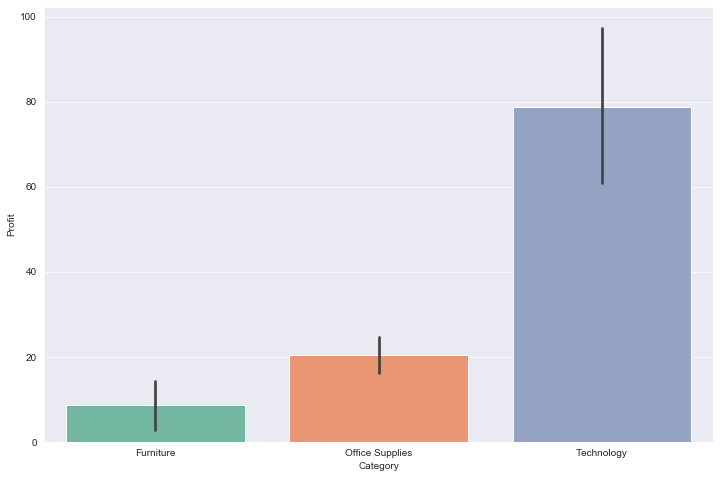

In [21]:
#Category Wise profit in the whole country
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ssd, palette="Set2")

###### Technology has more profit in whole country.

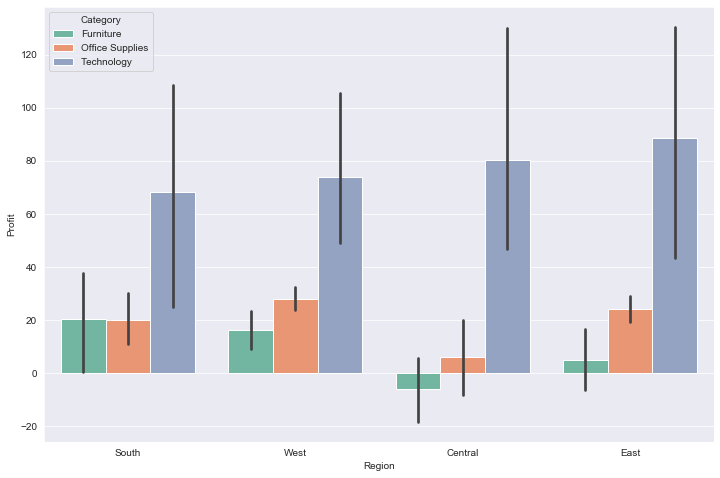

In [22]:
#Category wise Profit in Each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=ssd, palette="Set2")

###### Simply 'Technology' generates highest profit in every region. And 'Furniture' is lagging in all the regions except South region. Most importantly, at Central region, 'Furniture' is experiencing loss. 

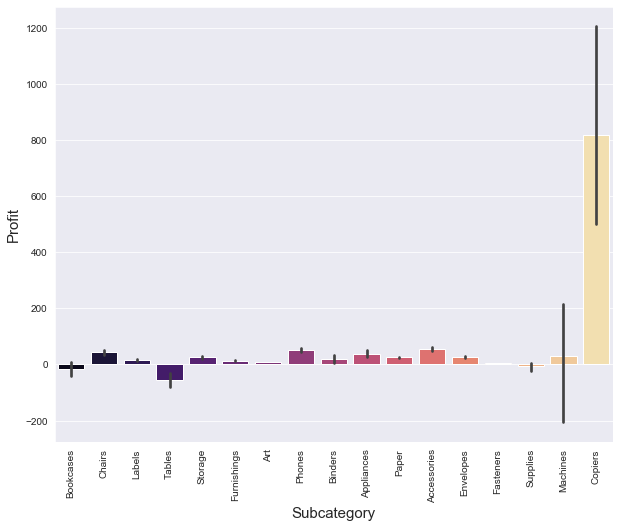

In [23]:
#Subcategory wise profit
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ssd, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

###### Copiers are gaining huge profit

# Conclusion:
###### 1.In Shipping Modes, the most profitable and the most preferred shipping mode is the Standard Class. 
###### 2. The Consumer Segment is the most profitable and has the most number of buyers.  
###### 3. The Western region has the most sales and profit
###### 4. Office Supplies has the highest frequency of purchases. Technology has the most sales and is the most profitable. Furniture has the least profit although it has the second-highest sales. 
###### 5. Within Furniture, Tables in all segments undergoes heavy losses, and Tables also accounts for the highest loss amongst any other product.
###### 6. Out of the top 10 states with the highest sales, 5 undergo an overall loss.
###### 7. Texas, which has the third-highest sales, witnesses the highest loss.
###### 8. The profit for both California and New York is more or less the same. But California has the highest sales, and New York the second highest. Therefore, we can say that for the same amount of sales, New York is more profitable.
###### 9. In technology, although Machines have a pretty decent sales, the resultant profit is low. However, copiers and accessories compensate for that
